In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [4]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Confirm it's loaded and show first rows
print(" Dataset Loaded")
print("Shape:", df.shape)

# Display first 5 rows
display(df.head())



✅ Dataset Loaded
Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Check data types and non-null counts
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check target class balance
print("\nChurn distribution:")
print(df["Churn"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


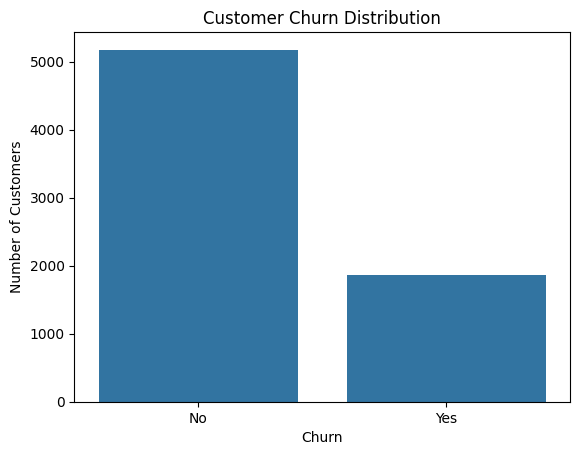

In [6]:
# Bar plot for Churn distribution
sns.countplot(data=df, x='Churn')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()


In [7]:
# Remove rows where TotalCharges is blank (these are usually spaces, not NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

# Drop customerID column (not useful for modeling)
df.drop('customerID', axis=1, inplace=True)

print("Cleaned TotalCharges and removed customerID")


Cleaned TotalCharges and removed customerID


In [8]:
# Encode target column Churn
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Identify categorical features
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(" Encoded categorical columns")


 Encoded categorical columns


In [9]:
# Separate features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Data ready for model training")


 Data ready for model training


In [10]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

print("Train/Test split complete")


Train/Test split complete


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the ANN model
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Optional: dropout to reduce overfitting
model.add(Dropout(0.2))

# Second hidden layer
model.add(Dense(16, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(" ANN model built and compiled")


 ANN model built and compiled


/opt/anaconda3/envs/churn-lab/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.6337 - loss: 0.6134 - val_accuracy: 0.7947 - val_loss: 0.4289
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.7863 - loss: 0.4453 - val_accuracy: 0.8018 - val_loss: 0.4140
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.7950 - loss: 0.4270 - val_accuracy: 0.8187 - val_loss: 0.4072
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.7858 - loss: 0.4413 - val_accuracy: 0.8098 - val_loss: 0.4047
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.8071 - loss: 0.4131 - val_accuracy: 0.8080 - val_loss: 0.4070
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8020 - loss: 0.4186 - val_accuracy: 0.8142 - val_loss: 0.4030
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.7953 - loss: 0.4295 - val_accuracy: 0.8151 - val_loss: 0.4010
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.8023 - loss: 0.4140 - 

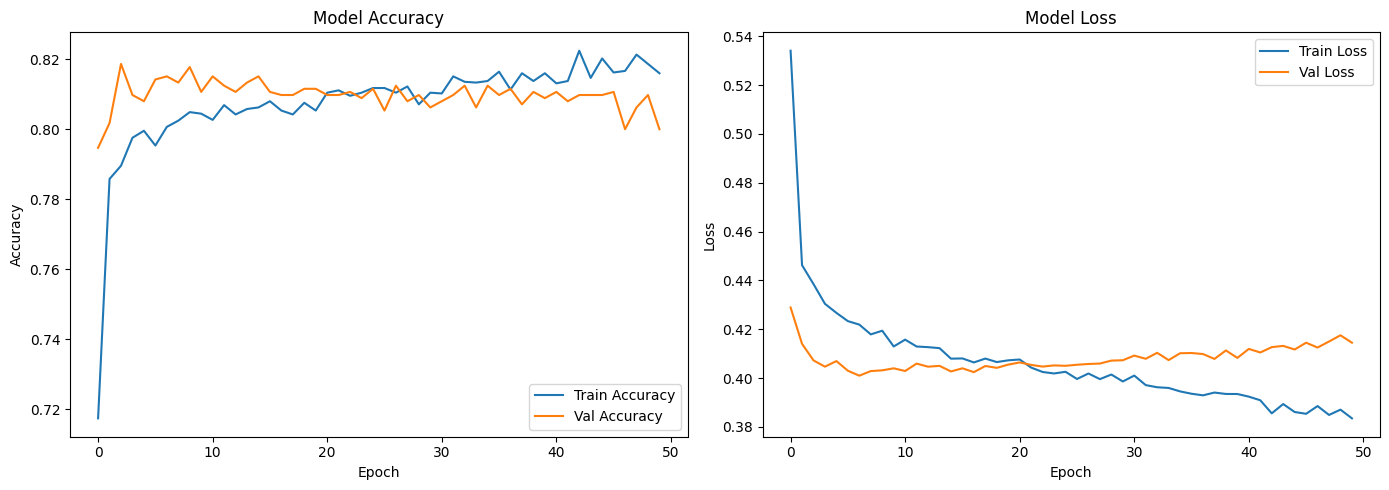

In [13]:
# Plot accuracy and loss curves
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Print metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_labels))
print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_labels))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
Confusion Matrix:
 [[895 138]
 [177 197]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.78      0.77      1407


Accuracy Score: 0.7761194029850746
